In [1]:

import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn import metrics
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
Folder = 'C:/Users/Dikla/Desktop/train/'

dog_train = [Folder+ dog for dog in os.listdir(Folder) if 'dog' in dog]
cat_train = [Folder+ cat for cat in os.listdir(Folder) if 'cat' in cat]

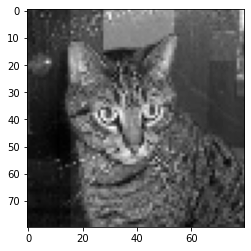

In [3]:
main_dir = "C:/Users/Dikla/Desktop/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)


p = os.listdir(path)[1]
img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

# making all images to gray scale 2D arrays

In [ ]:
#dog_lists
img_array = cv2.imread(dog_train[0],cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array, dsize=(80, 80))
img_array = img_array.ravel()
list_dog = pd.DataFrame(img_array)
for i in range (0, len(dog_train)):
    img_array = cv2.imread(dog_train[i],cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, dsize=(80, 80))
    img_array = img_array.ravel()
    list_dog[i] = img_array

In [ ]:
list_dog = list_dog.T
list_dog

In [ ]:
#cat_lists
img_array = cv2.imread(cat_train[0],cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array, dsize=(80, 80))
img_array = img_array.ravel()
list_cat = pd.DataFrame(img_array)
for i in range (0, len(cat_train)):
    img_array = cv2.imread(cat_train[i],cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, dsize=(80, 80))
    img_array = img_array.ravel()
    list_cat[i] = img_array

In [ ]:
list_cat = list_cat.T
list_cat

In [ ]:
list_dog['label'] = 0
list_cat['label'] = 1

In [ ]:
df0 = pd.concat([list_dog, list_cat],ignore_index = True)

In [ ]:
df0

In [ ]:
df1 = df0.drop_duplicates()
df1

In [ ]:
#בגלל שזה תמונות אין ציפיה שיהיו נאנים
df1.isna().sum().sum()

In [ ]:
X = df1.drop(['label'],axis = 1)
y = df1.label

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#reset index again
df = X_train_2.reset_index()
df = df.drop(['index'], axis = 1)

y = y_train_2.reset_index()
y = y.drop(['index'], axis = 1)

### split again

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_train = y_train.values.ravel() # Transforming dataframe to 1Darry

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) + 1
print (d)

In [ ]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(scaler.transform(X_test.values))

In [ ]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))

In [ ]:
knnpca = KNeighborsClassifier()
knnpca.fit(X_train_reduced,y_train)

In [ ]:
#knnpca
pred = knnpca.predict(X_test_reduced)
print(accuracy_score(y_test, pred))

In [ ]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reduced, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
lr = LogisticRegression()

In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('knn',knnpca),("RF",clf),('gaussian-bayes',gnb)])

In [ ]:
from sklearn.metrics import accuracy_score
voting.fit(X_train_reduced,y_train)
pred = voting.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train_reduced , y_train)
y_pred = bag_clf.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

In [ ]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train_reduced , y_train)
y_pred = bag_clf1.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

In [ ]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 1000,learning_rate = 0.1,use_label_encoder = False, eval_metric = "merror")

In [ ]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train_reduced, y_train)
pred = ada_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

# Color Images

In [ ]:
   # img_array1 = img_array1.reshape((img_array1.shape[0]*img_array1.shape[1]), img_array1.shape[2])# 3D to 2D array
    #img_array1 = img_array1.transpose()# 3D to 2D array

In [ ]:
main_dir = "C:/Users/Dikla/Desktop/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)


p = os.listdir(path)[1]
img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_COLOR)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

In [ ]:
#dog_lists
img_array = cv2.imread(dog_train[0],cv2.IMREAD_COLOR)
img_array = cv2.resize(img_array, dsize=(50, 50))
img_array = img_array.ravel()
list_dog = pd.DataFrame(img_array)
for i in range (0, len(dog_train)):
    img_array = cv2.imread(dog_train[i],cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, dsize=(50, 50))
    img_array = img_array.ravel()
    list_dog[i] = img_array

In [ ]:
list_dog = list_dog.T
list_dog

In [ ]:
#cat_lists
img_array = cv2.imread(cat_train[0],cv2.IMREAD_COLOR)
img_array = cv2.resize(img_array, dsize=(50, 50))
img_array = img_array.ravel()
list_cat = pd.DataFrame(img_array)
for i in range (0, len(cat_train)):
    img_array = cv2.imread(cat_train[i],cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, dsize=(50, 50))
    img_array = img_array.ravel()
    list_cat[i] = img_array

In [ ]:
list_cat = list_cat.T
list_cat

In [ ]:
list_dog['label'] = 0
list_cat['label'] = 1

In [ ]:
df01 = pd.concat([list_dog, list_cat],ignore_index = True)

In [ ]:
df01

In [ ]:
df02 = df01.drop_duplicates()
df02

In [ ]:
df02.isna().sum().sum()

In [ ]:
X = df02.drop(['label'],axis = 1)
y = df02.label

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#reset index again
df = X_train_2.reset_index()
df = df.drop(['index'], axis = 1)

y = y_train_2.reset_index()
y = y.drop(['index'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_train = y_train.values.ravel() # Transforming dataframe to 1Darry

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) + 1
print (d)

In [ ]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(scaler.transform(X_test.values))

In [ ]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))

In [ ]:
knnpca = KNeighborsClassifier()
knnpca.fit(X_train_reduced,y_train)

In [ ]:
#knnpca
pred = knnpca.predict(X_test_reduced)
print(accuracy_score(y_test, pred))


In [ ]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reduced, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
lr = LogisticRegression()

In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('knn',knnpca),("RF",clf),('gaussian-bayes',gnb)])

In [ ]:
from sklearn.metrics import accuracy_score
voting.fit(X_train_reduced,y_train)
pred = voting.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train_reduced , y_train)
y_pred = bag_clf.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

In [ ]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train_reduced , y_train)
y_pred = bag_clf1.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

In [ ]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 2000,learning_rate = 0.04,use_label_encoder = False, eval_metric = "merror")

In [ ]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train_reduced, y_train)
pred = ada_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

In [ ]:
#X_test_2,y_test_2